## Plotting the Mandelbrot Set

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set):

> The Mandelbrot set is the set of complex numbers `c` for which the function `f_c(z) = z^2 + c` does not diverge when iterated from `z = 0`.

We can produce nice fractal images using this set by:

- sampling a range of complex numbers
- testing whether the sequence goes to infinity within some threshold number of iterations
- plotting these numbers, colouring each pixel depending on how quickly the sequence goes to infinity

The code to do this is below, split up into sections to explain what's happening.

First we define the function to work out whether a complex number diverges in the relevant sequence:

In [1]:
def mandelbrot_pixel_value(x, y):
    """
    Returns the number of iterations required for divergence
    """
    n_iterations = 50
    divergence_threshold = 2    
    
    # Create complex number
    c = complex(x, y)
    
    # Iterate through divergence check
    z = c
    for i in range(n_iterations):
        z = z*z + c
        
        print(z)
        
        # Check if we're diverging
        if abs(z) >= divergence_threshold:
            return i

    # Here we've reached the max number of iterations
    return n_iterations

Here we do the bulk of the work, building a matrix to hold the pixel values, then iterating through our range of complex numbers:

In [2]:
import numpy as np

def build_pixel_matrix(min_x, max_x, min_y, max_y, step_size):
    """
    Builds the matrix of pixels to be rendered in the image
    """    
    # Create a matrix to hold the pixels
    size_x = int((max_x - min_x) / step_size)
    size_y = int((max_y - min_y) / step_size)

    image = np.zeros((size_x, size_y), dtype = np.uint8)
    
    for x in range(size_x):    
        for y in range(size_y):      
            i = min_x + x * (step_size)
            j = min_y + y * (step_size)

            # Calculate pixel value
            pixel_value = mandelbrot_pixel_value(i, j)

            # Add to the image
            image[x, y] = pixel_value
            
    return image

Now we actually call the function to generate the pixel matrix

In [3]:
%%capture

MIN_X = -1.75
MAX_X = 0.75

MIN_Y = -1.25
MAX_Y = 1.25

STEP_SIZE = 0.01

image = build_pixel_matrix(MIN_X, MAX_X, MIN_Y, MAX_Y, STEP_SIZE)

We can then use `matplotlib` to plot the image

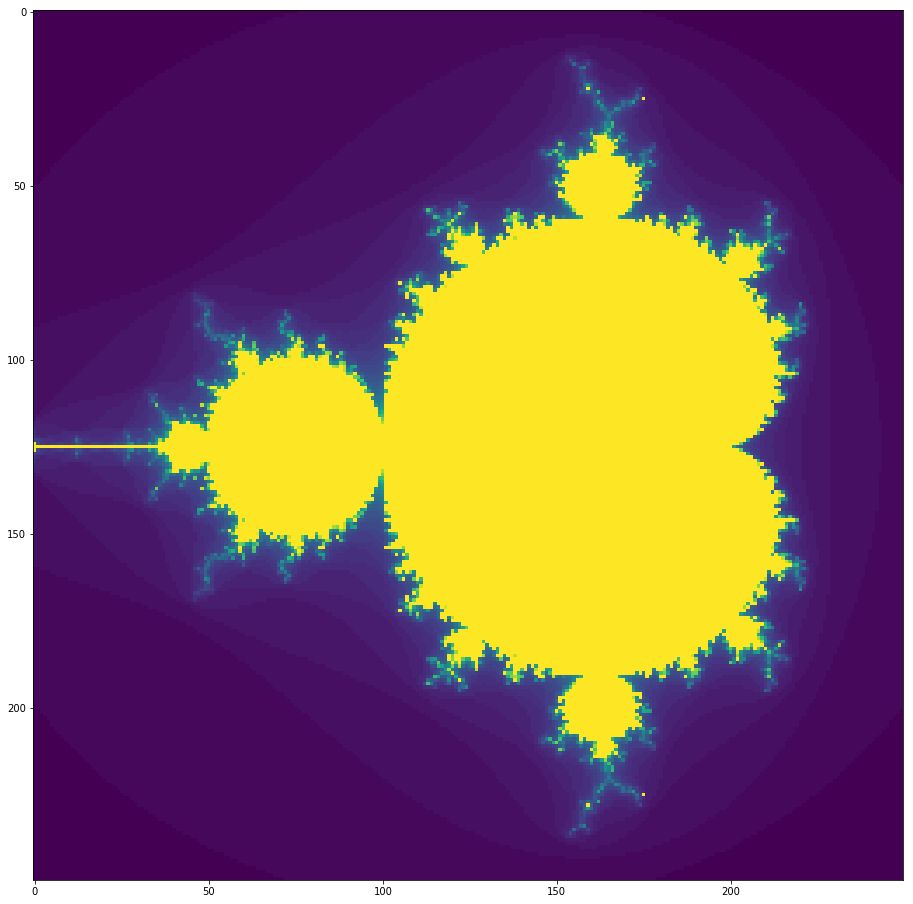

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 16))
plt.imshow(image.T)
plt.show()

## Exercise

Can you zoom in on a smaller area of the set?

What happens to the time the calculation takes if you try to increase the resolution? Do this very slowly as it can crash the notebook!